# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import os
from pprint import pprint as pp

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_directory = 'output_data'
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
def create_sets(cities, chunk_size):
    for i in range(0, len(cities), chunk_size):
        yield cities[i: i + chunk_size]

# break down cities list into list of lists of size 50
chunk_size = 50
sets = create_sets(cities, chunk_size)

# get weather data from one city by calling API

def get_weather_data(city):
    
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{url}appid={api_key}&q={city}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    return weather_json

# Run the loop for all sets

def run_all_cities(cities):    
    set_number = 1
    all_weather_data = []
    
    for set in sets:
        record = 1
        for city_value in set:
            weather_data = get_weather_data(city_value)
            weather_data

            # include format string into it along with try catch if city is not found

            if weather_data['cod'] == 200:
                print(f'Processing Record {record} of Set {set_number} | {city_value}')

                # Save data into another list
                all_weather_data.append(weather_data)

                record += 1
            else:             
                print('City not found. Skipping...')
        set_number += 1
    
    return all_weather_data
 
print("""-----------------------------
Beginning Data Retrieval      
-----------------------------""")

cities_weather_data = run_all_cities(sets)

print("""-----------------------------
Data Retrieval Complete      
-----------------------------""")


-----------------------------
Beginning Data Retrieval      
-----------------------------
Processing Record 1 of Set 1 | tuatapere
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | harnosand
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | belmonte
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | hami
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | longyearbyen
City not found. Skipping...
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | asadabad
Processing Record 17 of Set 1 | greenville
Processing Record 18 of Set 1 | sulangan
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | fairbanks
Processing Recor

Processing Record 4 of Set 5 | taoudenni
City not found. Skipping...
Processing Record 5 of Set 5 | nikolskoye
Processing Record 6 of Set 5 | marrakesh
Processing Record 7 of Set 5 | lorengau
Processing Record 8 of Set 5 | tierranueva
Processing Record 9 of Set 5 | pangnirtung
Processing Record 10 of Set 5 | ballitoville
Processing Record 11 of Set 5 | bikin
Processing Record 12 of Set 5 | bilma
City not found. Skipping...
Processing Record 13 of Set 5 | storforshei
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 5 | juneau
Processing Record 15 of Set 5 | caravelas
Processing Record 16 of Set 5 | kaeo
Processing Record 17 of Set 5 | trincomalee
Processing Record 18 of Set 5 | hithadhoo
Processing Record 19 of Set 5 | alugan
Processing Record 20 of Set 5 | vilhena
City not found. Skipping...
Processing Record 21 of Set 5 | balikpapan
City not found. Skipping...
Processing Record 22 of Set 5 | narsaq
Processing Record 23 of Set 5 | kaputa
Processing Re

Processing Record 11 of Set 9 | jining
Processing Record 12 of Set 9 | massakory
Processing Record 13 of Set 9 | turukhansk
Processing Record 14 of Set 9 | karratha
Processing Record 15 of Set 9 | liku
City not found. Skipping...
Processing Record 16 of Set 9 | samarai
Processing Record 17 of Set 9 | cherskiy
Processing Record 18 of Set 9 | fukue
Processing Record 19 of Set 9 | swift current
Processing Record 20 of Set 9 | fomboni
Processing Record 21 of Set 9 | kieta
Processing Record 22 of Set 9 | falun
Processing Record 23 of Set 9 | lipari
City not found. Skipping...
Processing Record 24 of Set 9 | sao felix do xingu
Processing Record 25 of Set 9 | imeni poliny osipenko
Processing Record 26 of Set 9 | coihaique
Processing Record 27 of Set 9 | mehamn
Processing Record 28 of Set 9 | darnah
Processing Record 29 of Set 9 | pyaozerskiy
Processing Record 30 of Set 9 | pangkalanbuun
Processing Record 31 of Set 9 | astana
Processing Record 32 of Set 9 | ouargaye
Processing Record 33 of Set

Processing Record 13 of Set 13 | okitipupa
Processing Record 14 of Set 13 | sarangani
Processing Record 15 of Set 13 | faya
Processing Record 16 of Set 13 | tobe
City not found. Skipping...
Processing Record 17 of Set 13 | aklavik
Processing Record 18 of Set 13 | nsanje
City not found. Skipping...
Processing Record 19 of Set 13 | ban nahin
Processing Record 20 of Set 13 | erenhot
Processing Record 21 of Set 13 | zhuanghe
Processing Record 22 of Set 13 | malinalco
Processing Record 23 of Set 13 | aksu
Processing Record 24 of Set 13 | wewak
-----------------------------
Data Retrieval Complete      
-----------------------------



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
def mapper(dict):
    return {
        'City': row['name'],
        'Cloudiness' : row['clouds']['all'],
        'Country': row['sys']['country'],
        'Date': row['dt'],
        'Humidity': row['main']['humidity'],
        'Lat': row['coord']['lat'],
        'Lng': row['coord']['lon'],
        'Max Temp': row['main']['temp_max'],
        'Wind Speed': row['wind']['speed']        
    }


city_weather_list = []

for row in cities_weather_data:
    city = mapper(row)
    city_weather_list.append(city)


In [5]:

# Convert to dataframe
weather_data_df = pd.DataFrame(city_weather_list)

# Check if directory exists
os.makedirs(output_directory, exist_ok=True)

# Save to Csv
weather_data_df.to_csv(os.path.join(output_directory, output_data_file), index=False, header=True)

# Preview Dataframe counts
weather_data_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [6]:
# def _json_object_hook(d): return namedtuple('x', d.keys())(*d.values())
# def json2obj(data): return json.loads(data, object_hook=_json_object_hook)

# data = cities_weather_data[0]

# x = json2obj(json.dumps(data))

# pp(x)
# pp(x.weather[0].main)
# pp(x.coord.lon)

# pp(f'{x.name}, {x.clouds.all}, {x.sys.country}, {x.dt}, {x.main.humidity}, {x.coord.lat}, {x.coord.lon}, {x.main.temp_max}, {x.wind.speed}')

# dict = {
#     'City': x.name,
#     'Cloudiness' : x.clouds.all,
#     'Country': x.sys.country,
#     'Date': x.dt,
#     'Humidity': x.main.humidity,
#     'Lat': x.coord.lat,
#     'Lng': x.coord.lon,
#     'Max Temp': x.main.temp_max,
#     'Wind Speed': x.wind.speed
# }

# df = pd.DataFrame([dict])
# df

In [7]:
# Preview Dataframe
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tuatapere,100,NZ,1569620631,75,-46.13,167.69,286.48,4.02
1,Saint-Philippe,0,CA,1569620631,60,45.36,-73.48,293.71,0.45
2,Harnosand,66,SE,1569620631,81,62.63,17.94,284.82,2.10
3,Albany,20,US,1569620516,49,42.65,-73.75,295.37,4.10
4,Belmonte,7,PT,1569620631,88,40.36,-7.35,289.82,1.30


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

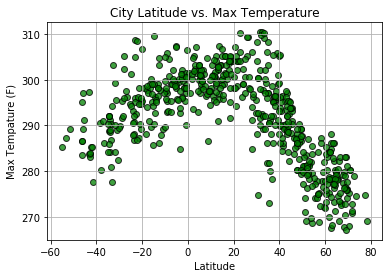

In [9]:
plt.scatter(weather_data_df['Lat'],weather_data_df['Max Temp'],marker="o", facecolors="green", edgecolors="black",alpha=0.75)
plt.grid()
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Tempature (F)')
plt.savefig("Images/LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

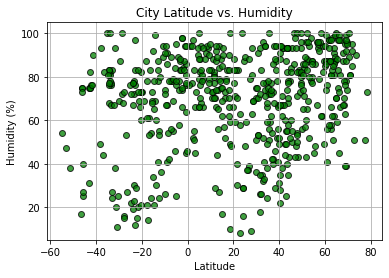

In [15]:
plt.scatter(weather_data_df['Lat'],weather_data_df['Humidity'],marker="o", facecolors="green", edgecolors="black",alpha=0.75)
plt.grid()
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(5, 105)
plt.savefig("Images/LatVshumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

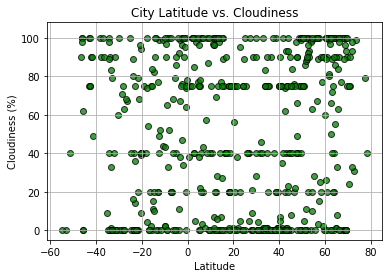

In [17]:
plt.scatter(weather_data_df['Lat'],weather_data_df['Cloudiness'],marker="o", facecolors="green", edgecolors="black",alpha=0.75)
plt.grid()
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 108)
plt.savefig("Images/LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

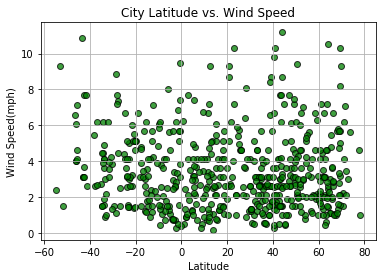

In [19]:
plt.scatter(weather_data_df['Lat'],weather_data_df['Wind Speed'],marker="o", facecolors="green", edgecolors="black",alpha=0.75)
plt.grid()
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig("Images/LatVsWindspeed.png")

plt.show()